In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [4]:
R1 = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmpzpcowq7yGP2


In [5]:
# load our lucchi augmented dataset with flipped and rotated images (2640 images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/augmented_images_flip_rotate.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/augmented_masks_flip_rotate.npy')

In [6]:
#trying flipped images with slightly different weights
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.2,
    'A_test': 0.7,
    'B': 0.35,
    'B_train': 0.6,
    'B_val': 0.1,
    'B_test': 0.3,
    'Z': 0.15
}
PERCENT_TO_REPLACE = 10
R1 = Runner(verbose=False)
R1.setup_data(images, masks, dataset_size=2640, weights=weights)
RUNS = 10

*** GP2 ***
Working directory: /tmp/tmpz9sreoaqGP2
Weights OK!


In [7]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R1.run_classifier()
    R1.run_discriminator()
    l = R1.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R1.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpz9sreoaqGP2/unet_0.model
History saved to /tmp/tmpz9sreoaqGP2/history_0.pickle
Testing the classifier...
29/29 [==============================] - 3s 102ms/step - loss: 1.2416 - dice_coeff: 0.1020
Model saved to /tmp/tmpz9sreoaqGP2/cnnd_0.model
History saved to /tmp/tmpz9sreoaqGP2/cnnd_history_0.pickle
Testing the discriminator...
9/9 [==============================] - 0s 23ms/step - loss: 4.3475 - accuracy: 0.9639
Found 123 machine labels.
Replacing 12 from 123 !
D_relabeled_ 12
point ids 12
Removed: 12 Filled: 12
TOOK 712.0566537380219 seconds
***
RUN: 1
Model saved to /tmp/tmpz9sreoaqGP2/unet_1.model
History saved to /tmp/tmpz9sreoaqGP2/history_1.pickle
Testing the classifier...
29/29 [==============================] - 3s 97ms/step - loss: 1.2101 - dice_coeff: 0.0991
Testing the discriminator...
9/9 [==============================] - 0s 21ms/step - loss: 11.7174 - accuracy: 0.9531
Found 123 machine labels.
Replacing 12 from 123 !
D_relabeled_ 12
poin

In [8]:
R1.classifier_scores

[[1.2415717840194702, 0.1019691601395607],
 [1.2100785970687866, 0.09908796101808548],
 [1.1700589656829834, 0.1090250238776207],
 [1.1646314859390259, 0.11160407215356827],
 [1.074663758277893, 0.17583052814006805],
 [0.939910352230072, 0.2805939018726349]]

In [9]:
R1.discriminator_scores

[[4.347457408905029, 0.9638988971710205],
 [11.717442512512207, 0.9530686140060425],
 [215.8484649658203, 0.6859205961227417],
 [331.7566833496094, 0.6209385991096497],
 [1125.469482421875, 0.5162454843521118],
 [2256.008056640625, 0.4729241728782654]]

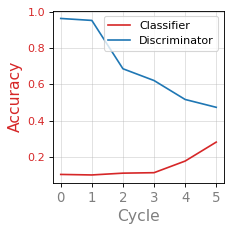

In [10]:
R1.plot()